In [4]:
import numpy as np
import matplotlib.pyplot as plt

import glob
import os

w = np.loadtxt('./runs/mpsa.wave')

mh0_hyd = glob.glob('./met_npz/mh0-hyd_*')
mh1_hyd = glob.glob('./met_npz/mh1-hyd_*')
mh0_ssd = glob.glob('./met_npz/mh0-ssd_*')
mh1_ssd = glob.glob('./met_npz/mh1-ssd_*')
mh0_300 = glob.glob('./met_npz/mh0-300_*')
mh1_300 = glob.glob('./met_npz/mh1-300_*')

I0m0 = np.zeros((9, len(w)))
I0m1 = np.zeros((9, len(w)))
ISm0 = np.zeros((9, len(w)))
ISm1 = np.zeros((9, len(w)))
I3m0 = np.zeros((9, len(w)))
I3m1 = np.zeros((9, len(w)))

for f in mh0_hyd: I0m0 += np.load(f)['I']
for f in mh1_hyd: I0m1 += np.load(f)['I']
for f in mh0_ssd: ISm0 += np.load(f)['I']
for f in mh1_ssd: ISm1 += np.load(f)['I']
for f in mh0_300: I3m0 += np.load(f)['I']
for f in mh1_300: I3m1 += np.load(f)['I']
    
I0m0 /= len(mh0_hyd)
I0m1 /= len(mh1_hyd)
ISm0 /= len(mh0_ssd)
ISm1 /= len(mh1_ssd)

In [50]:
plt_mu = np.array([10, 8, 6, 4, 2]).astype(int)

mu_labels = ['0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']

for i in plt_mu - 2:
    
    plt.close('all')

    fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (18.0, 12.06))

    fig.suptitle(r'$\mu = $' + mu_labels[i], y = 0.92)

    ax[0, 0].plot(w, I0m0[i, :], color = 'k', label = '[F / H] = 0')
    ax[0, 0].plot(w, I0m1[i, :], color = 'r', label = '[F / H] = -1')
    ax[0, 1].plot(w, I0m0[i, :], color = 'k')
    ax[0, 1].plot(w, I0m1[i, :], color = 'r')
    
    ax[0, 0].set_ylabel('Intensity, cgs: hydro')
    
    ax[1, 0].plot(w, ISm0[i, :], color = 'k')
    ax[1, 0].plot(w, ISm1[i, :], color = 'r')
    ax[1, 1].plot(w, ISm0[i, :], color = 'k')
    ax[1, 1].plot(w, ISm1[i, :], color = 'r')
    
    ax[1, 0].set_ylabel('Intensity, cgs: ssd')

    ax[2, 0].plot(w, I3m0[i, :], color = 'k')
    ax[2, 0].plot(w, I3m1[i, :], color = 'r')
    ax[2, 1].plot(w, I3m0[i, :], color = 'k')
    ax[2, 1].plot(w, I3m1[i, :], color = 'r')
    
    ax[2, 0].set_xlabel('Wavelength, nm')
    ax[2, 1].set_xlabel('Wavelength, nm')
    ax[2, 0].set_ylabel('Intensity, cgs: 300G')
    
    leg = ax[0, 0].legend(framealpha = 1, loc = 1, handletextpad = 1, prop = {'size': 12.5})
    
    for k in [0, 1, 2]:

#        ax[k, 0].set_xlim(3500, 10000)
        ax[k, 0].set_xlim(180, 3500)
        ax[k, 1].set_xlim(180, 500)
        
        ax[k, 0].set_ylim(1e-10, 4.5e-5)
#        ax[k, 0].set_ylim(1e-10, 1e-5)
        ax[k, 1].set_ylim(1e-10, 1e-4)

        ax[k, 1].set_yscale('log')
    
    plt.savefig('./met/' + str(i) + '.abs.pdf', bbox_inches = 'tight')

#    if i == 8: plt.show()

os.chdir('./met/')

os.system('pdftk 8.abs.pdf 6.abs.pdf 4.abs.pdf 2.abs.pdf 0.abs.pdf output metallicity_specs.pdf')

os.system('rm 8.abs.pdf 6.abs.pdf 4.abs.pdf 2.abs.pdf 0.abs.pdf')

os.chdir('../')

In [51]:
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator

plt_mu = np.array([10, 8, 6, 4, 2]).astype(int)

mu_labels = ['0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']

for i in range(len(plt_mu)):
    
    plt.close('all')

    fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 2.412))

    mu = plt_mu[i] - 2
    
    ax.plot(w, I0m1[mu, :] / I0m0[mu, :], label = 'hydro', color = 'b')
    ax.plot(w, ISm1[mu, :] / ISm0[mu, :], label = 'ssd',   color = 'g')
    
    if mu != 0:
        
        ax.plot(w, I3m1[mu, :] / I3m0[mu, :], label = '300G', color = 'orange')
    
    ax.axhline(y = 1.0, linestyle = '--', color = 'k')
   
    ax.set_xlim(300, 1000)
    ax.set_ylim(0.85, 1.6)
    
    ax.set_ylabel(r'-1/0 ratio: $\mu$ = ' + mu_labels[mu])
        
    leg = ax.legend(framealpha = 1, loc = 1, handletextpad = 1, prop = {'size': 12.5})
        
    ax.set_xlabel('Wavelength, nm')
        
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    
    plt.savefig('./met/' + str(mu) + '.rat.pdf', bbox_inches = 'tight')
    
os.chdir('./met/')

os.system('pdftk 8.rat.pdf 6.rat.pdf 4.rat.pdf 2.rat.pdf 0.rat.pdf output ratio_of_spectra_for_different_metallicities.pdf')

os.system('rm -f 8.rat.pdf 6.rat.pdf 4.rat.pdf 2.rat.pdf 0.rat.pdf')

os.chdir('../')

In [52]:
plt_mu = np.array([10, 8, 6, 4]).astype(int)

mu_labels = ['0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']

plt.close('all')

fig, ax = plt.subplots(nrows = len(plt_mu), ncols = 2, figsize = (12.0, 12.06))

fig.tight_layout()

for i in range(len(plt_mu)):
    
    mu = plt_mu[i] - 2
    
    ax[i, 0].plot(w, I3m0[mu, :] / I0m0[mu, :], label = '[F / H] = 0', color = 'b')
    ax[i, 0].plot(w, I3m1[mu, :] / I0m1[mu, :], label = '[F / H] = -1', color = 'g')
    
#    ax[i, 0].plot(w, I3m0_1d_fal[i, :] / I0m0_1d_fal[i, :], label = '[F / H] = 0 (1D)', linestyle = '--', color = 'b')
#    ax[i, 0].plot(w, I3m1_1d_fal[i, :] / I0m1_1d_fal[i, :], label = '[F / H] = -1 (1D)', linestyle = '--', color = 'g')
    
    ax[i, 1].plot(w, I3m0[mu, :] / ISm0[mu, :], color = 'b')
    ax[i, 1].plot(w, I3m1[mu, :] / ISm1[mu, :], color = 'g')
    
#    ax[i, 1].plot(w, I3m0_1d_fal[i, :] / I0m0_1d_fal[i, :], color = 'b', linestyle = '--')
#    ax[i, 1].plot(w, I3m1_1d_fal[i, :] / I0m1_1d_fal[i, :], color = 'g', linestyle = '--')

    for j in [0, 1]:
        
        ax[i, j].set_xlim(300, 1000)
        ax[i, j].set_ylim(0.9, 1.5)
        
        ax[i, j].axhline(y = 1.0, linestyle = '--', color = 'k')
        
        ax[i, j].xaxis.set_minor_locator(AutoMinorLocator(5))
        
        if i == len(plt_mu) - 1: ax[i, j].set_xlabel('Wavelength, nm')
    
    ax[i, 0].set_ylabel(r'300G / hydro: $\mu$ = ' + mu_labels[mu])
    ax[i, 1].set_ylabel(r'300G / ssd: $\mu$ = ' + mu_labels[mu])
    
    if i == 0: leg = ax[i, 0].legend(framealpha = 1, loc = 1, handletextpad = 1, prop = {'size': 12.5})

plt.savefig('./met/comparison_of_contrasts_for_different_metallicities.pdf', bbox_inches = 'tight')

In [53]:
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator

plt_mu = np.array([10, 8, 6, 4]).astype(int)

mu_labels = ['0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']

for i in range(len(plt_mu)):
    
    plt.close('all')

    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 2.412))

    ax[0].set_title('[F / H] = 0')
    ax[1].set_title('[F / H] = -1')
    
    mu = plt_mu[i] - 2
    
    ax[0].plot(w, I3m0[mu, :] / I0m0[mu, :], label = 'hydro', color = 'b')
    ax[0].plot(w, I3m0[mu, :] / ISm0[mu, :], label = 'ssd',   color = 'g')
    
#    ax[0].plot(w, I3m0_1d_kur[i, :] / I0m0_1d_kur[i, :], label = 'kur', color = 'orange')
#    ax[0].plot(w, I3m0_1d_fal[i, :] / I0m0_1d_fal[i, :], label = 'fal', color = 'purple')
    
    ax[1].plot(w, I3m1[mu, :] / I0m1[mu, :], label = 'hydro', color = 'b')
    ax[1].plot(w, I3m1[mu, :] / ISm1[mu, :], label = 'ssd',   color = 'g')
    
#    ax[1].plot(w, I3m1_1d_kur[i, :] / I0m1_1d_kur[i, :], label = 'kur', color = 'orange')
#    ax[1].plot(w, I3m1_1d_fal[i, :] / I0m1_1d_fal[i, :], label = 'fal', color = 'purple')
    
    ax[0].axhline(y = 1.0, linestyle = '--', color = 'k')
    ax[1].axhline(y = 1.0, linestyle = '--', color = 'k')
    
    for k in range(2):
    
        ax[k].set_xlim(300, 1000)
        
    ax[0].set_ylim(0.95, 1.5)
    ax[1].set_ylim(0.95, 1.5)
    
    ax[0].set_ylabel(r'300G / {hydro, ssd}: $\mu$ = ' + mu_labels[mu])
        
    leg = ax[0].legend(framealpha = 1, loc = 1, handletextpad = 1, prop = {'size': 12.5})
        
    ax[0].set_xlabel('Wavelength, nm')
    ax[1].set_xlabel('Wavelength, nm')
        
    ax[0].xaxis.set_minor_locator(AutoMinorLocator(5))
    ax[1].xaxis.set_minor_locator(AutoMinorLocator(5))
    
    plt.savefig('./met/' + str(mu) + '.hsc.pdf', bbox_inches = 'tight')
    
os.chdir('./met/')

os.system('pdftk 8.hsc.pdf 6.hsc.pdf 4.hsc.pdf 2.hsc.pdf output hydro_to_ssd_contrast_comparison.pdf')

os.system('rm -f 8.hsc.pdf 6.hsc.pdf 4.hsc.pdf 2.hsc.pdf')

os.chdir('../')

In [75]:
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator

import matplotlib.gridspec as gridspec

from tqdm import tqdm

import os

mu = np.array([0.4, 0.6, 0.8, 1.0])

os.system('rm -f ./met/clv_mag/*.pdf')

pdfs = ' '

for i in tqdm(range(331, 683)):
#for i in tqdm(range(331, 361)):
    
    plt.close('all')
    
    fig = plt.figure(constrained_layout = True, figsize = (12, 6))
    
    gs = gridspec.GridSpec(nrows = 2, ncols = 3, figure = fig)
    
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[0, 2])
    ax4 = fig.add_subplot(gs[1, :])
    
    ax1.set_title('hydro')
    ax2.set_title('ssd')
    ax3.set_title('300G')
    
    ax1.scatter(mu, I0m0[2:10:2, i], label = '[Fe / H] = 0',  color = 'k')
    ax1.scatter(mu, I0m1[2:10:2, i], label = '[Fe / H] = -1', color = 'r', s = 12.6)
    
    ax2.scatter(mu, ISm0[2:10:2, i], label = '[Fe / H] = 0',  color = 'k')
    ax2.scatter(mu, ISm1[2:10:2, i], label = '[Fe / H] = -1', color = 'r', s = 12.6)
    
    ax3.scatter(mu, I3m0[2:10:2, i], label = '[Fe / H] = 0',  color = 'k')
    ax3.scatter(mu, I3m1[2:10:2, i], label = '[Fe / H] = -1', color = 'r', s = 12.6)
    
    ax4.plot(w, ISm0[8, :] * 1e+5, label = '[Fe / H] = 0',  color = 'k')
    ax4.plot(w, ISm1[8, :] * 1e+5, label = '[Fe / H] = -1', color = 'r')

    ax4.axvline(x = w[i], linestyle = '--', linewidth = 0.4, color = 'k')
    
    ax4.xaxis.set_major_locator(MultipleLocator(50))
    ax4.xaxis.set_minor_locator(AutoMinorLocator(5))
    
    ax1.set_ylabel(r'Intensity, cgs')
    ax4.set_ylabel(r'Intensity, cgs * 10$^5$')
        
    ax1.set_xlim(1.05, 0.35)
    ax2.set_xlim(1.05, 0.35)
    ax3.set_xlim(1.05, 0.35)

    ax1.set_yscale('log')
    ax2.set_yscale('log')
    ax3.set_yscale('log')
    
    ax1.set_ylim(5e-7, 5e-5)
    ax2.set_ylim(5e-7, 5e-5)
    ax3.set_ylim(5e-7, 5e-5)
    
    ax4.set_xlim(250, 1050)
        
    ax1.set_xlabel(r'$\mu$')
    ax2.set_xlabel(r'$\mu$')
    ax3.set_xlabel(r'$\mu$')
    
    ax4.set_xlabel('Wavelength, nm')
    
    leg = ax4.legend(framealpha = 1, loc = 4, handletextpad = 1, prop = {'size': 12.5})
    
    pdfs += './met/clv_mag/' + str(i) + '.pdf '
    
    plt.savefig('./met/clv_mag/' + str(i) + '.pdf', bbox_inches = 'tight')

os.system('pdftk ' + pdfs + 'output ./met/clv_mag/all.pdf')

100%|██████████| 352/352 [17:04<00:00,  3.01s/it]


0

In [83]:
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator

import matplotlib.gridspec as gridspec

from tqdm import tqdm

import os

mu = np.array([0.4, 0.6, 0.8, 1.0])

os.system('rm -f ./met/clv_met/*.pdf')

pdfs = ' '

for i in tqdm(range(331, 683)):
#for i in tqdm(range(331, 361)):
    
    plt.close('all')
    
    fig = plt.figure(constrained_layout = True, figsize = (12, 6))
    
    gs = gridspec.GridSpec(nrows = 2, ncols = 2, figure = fig)
    
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, 0])
    ax4 = fig.add_subplot(gs[1, 1])
    
    ax1.set_title('[Fe / H] = 0')
    ax2.set_title('[Fe / H] = -1')
    
    ax1.scatter(mu, I0m0[2:10:2, i], label = 'hydro', color = 'g', s = 14.6)
    ax1.scatter(mu, ISm0[2:10:2, i], label = 'ssd',   color = 'b', s = 12.6)
    ax1.scatter(mu, I3m0[2:10:2, i], label = '300G',  color = 'r', s = 10.6)
    
    ax2.scatter(mu, I0m1[2:10:2, i], label = 'hydro', color = 'g', s = 14.6)
    ax2.scatter(mu, ISm1[2:10:2, i], label = 'ssd',   color = 'b', s = 12.6)
    ax2.scatter(mu, I3m1[2:10:2, i], label = '300G',  color = 'r', s = 10.6)
    
    ax3.plot(w, I0m0[8, :] * 1e+5, label = 'hydro', color = 'g')
    ax3.plot(w, ISm0[8, :] * 1e+5, label = 'ssd',   color = 'b')
    ax3.plot(w, I3m0[8, :] * 1e+5, label = '300G',  color = 'r')

    ax3.axvline(x = w[i], linestyle = '--', linewidth = 0.4, color = 'k')
    
    ax4.plot(w, I0m1[8, :] * 1e+5, label = 'hydro', color = 'g')
    ax4.plot(w, ISm1[8, :] * 1e+5, label = 'ssd',   color = 'b')
    ax4.plot(w, I3m1[8, :] * 1e+5, label = '300G',  color = 'r')

    ax4.axvline(x = w[i], linestyle = '--', linewidth = 0.4, color = 'k')
    
    ax3.xaxis.set_major_locator(MultipleLocator(50))
    ax3.xaxis.set_minor_locator(AutoMinorLocator(5))
    
    ax3.xaxis.set_major_locator(MultipleLocator(100))
    ax3.xaxis.set_minor_locator(AutoMinorLocator(4))
    
    ax4.xaxis.set_major_locator(MultipleLocator(100))
    ax4.xaxis.set_minor_locator(AutoMinorLocator(4))
    
    ax1.set_ylabel(r'Intensity, cgs')
    ax3.set_ylabel(r'Intensity, cgs * 10$^5$')
        
    ax1.set_xlim(1.05, 0.35)
    ax2.set_xlim(1.05, 0.35)

    ax1.set_yscale('log')
    ax2.set_yscale('log')
    
    ax1.set_ylim(5e-7, 5e-5)
    ax2.set_ylim(5e-7, 5e-5)

    ax3.set_xlim(250, 1050)
    ax4.set_xlim(250, 1050)
    
    ax3.set_ylim(0, 4.2)
    ax4.set_ylim(0, 4.2)
        
    ax1.set_xlabel(r'$\mu$')
    ax2.set_xlabel(r'$\mu$')
    
    ax3.set_xlabel('Wavelength, nm')
    ax4.set_xlabel('Wavelength, nm')
    
    leg = ax4.legend(framealpha = 1, loc = 4, handletextpad = 1, prop = {'size': 12.5})
    
    pdfs += './met/clv_met/' + str(i) + '.pdf '
    
    plt.savefig('./met/clv_met/' + str(i) + '.pdf', bbox_inches = 'tight')

os.system('pdftk ' + pdfs + 'output ./met/clv_met/all.pdf')

100%|██████████| 352/352 [12:18<00:00,  2.16s/it]


0

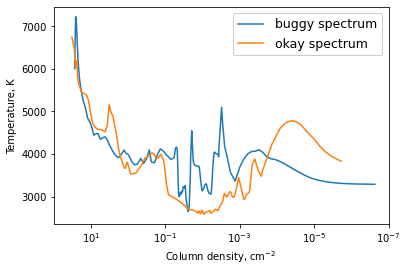

In [181]:
plt.plot(N_bug, T_bug, label = 'buggy spectrum')
plt.plot(N_nor, T_nor, label = 'okay spectrum')

plt.xlim(100, 1e-7)

plt.xscale('log')

leg = plt.legend(framealpha = 1, loc = 1, handletextpad = 1, prop = {'size': 12.5})

plt.xlabel(r'Column density, cm$^{-2}$')
plt.ylabel('Temperature, K')

plt.savefig('./met/bug_struct.pdf', bbox_inches = 'tight')

plt.show()

In [ ]:
plt_mu = np.array([10, 8, 6, 4]).astype(int)

mu_labels = ['0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']

plt.close('all')

fig, ax = plt.subplots(nrows = len(plt_mu), ncols = 2, figsize = (12.0, 12.06))

fig.tight_layout()

for i in range(len(plt_mu)):
    
    mu = plt_mu[i] - 2
    
    ax[i, 0].plot(w, I3m0[mu, :] / I0m0[mu, :], label = '[F / H] = 0 (1.5D)', color = 'b')
    ax[i, 0].plot(w, I3m1[mu, :] / I0m1[mu, :], label = '[F / H] = -1 (1.5D)', color = 'g')
    
    ax[i, 0].plot(w, I3m0_1d_kur[i, :] / I0m0_1d_kur[i, :], label = '[F / H] = 0 (1D)', linestyle = '--', color = 'b')
    ax[i, 0].plot(w, I3m1_1d_kur[i, :] / I0m1_1d_kur[i, :], label = '[F / H] = -1 (1D)', linestyle = '--', color = 'g')
    
    ax[i, 1].plot(w, I3m0[mu, :] / ISm0[mu, :], color = 'b')
    ax[i, 1].plot(w, I3m1[mu, :] / ISm1[mu, :], color = 'g')
    
    ax[i, 1].plot(w, I3m0_1d_kur[i, :] / I0m0_1d_kur[i, :], color = 'b', linestyle = '--')
    ax[i, 1].plot(w, I3m1_1d_kur[i, :] / I0m1_1d_kur[i, :], color = 'g', linestyle = '--')

    for j in [0, 1]:
        
        ax[i, j].set_xlim(180, 500)
        ax[i, j].set_ylim(0, 9)
        
        ax[i, j].axhline(y = 1.0, linestyle = '--', color = 'k')
        
        ax[i, j].xaxis.set_minor_locator(AutoMinorLocator(5))
        
        if i == len(plt_mu) - 1: ax[i, j].set_xlabel('Wavelength, nm')
    
    ax[i, 0].set_ylabel(r'300G / hydro: $\mu$ = ' + mu_labels[mu])
    ax[i, 1].set_ylabel(r'300G / ssd: $\mu$ = ' + mu_labels[mu])
    
    if i == 0: leg = ax[i, 0].legend(framealpha = 1, loc = 1, handletextpad = 1, prop = {'size': 12.5})

plt.savefig('./met/contrasts_kur.pdf', bbox_inches = 'tight')

In [ ]:
I0m0_1d_kur = np.genfromtxt('kur_q_m0').T
I0m1_1d_kur = np.genfromtxt('kur_q_m1').T

I3m0_1d_kur = np.genfromtxt('kur_f_m0').T
I3m1_1d_kur = np.genfromtxt('kur_f_m1').T

I0m0_1d_fal = np.genfromtxt('fal_q_m0').T
I0m1_1d_fal = np.genfromtxt('fal_q_m1').T

I3m0_1d_fal = np.genfromtxt('fal_f_m0').T
I3m1_1d_fal = np.genfromtxt('fal_f_m1').T

plt_mu = np.array([10, 8, 6, 4, 2]).astype(int)

mu_labels = ['0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']

for i, mu in enumerate(plt_mu - 2):
    
    plt.close('all')

    fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (18.0, 12.06))

    fig.suptitle(r'$\mu = $' + mu_labels[mu], y = 0.92)

    ax[0, 0].plot(w, I0m0[mu, :], color = 'k', label = '[F / H] = 0')
    ax[0, 0].plot(w, I0m1[mu, :], color = 'r', label = '[F / H] = -1')
    
    ax[0, 1].plot(w, I0m1[mu, :] / I0m0[mu, :],     color = 'b', label = '1.5D')
    
    ax[0, 1].plot(w, I0m1_1d_kur[i, :] / I0m0_1d_kur[i, :], color = 'g',      label = '1D (kur)')
    ax[0, 1].plot(w, I0m1_1d_fal[i, :] / I0m0_1d_fal[i, :], color = 'purple', label = '1D (fal)')
    
    ax[0, 1].axhline(y = 1.0, linestyle = '--', color = 'k')
    
    ax[0, 0].set_ylabel('Intensity, cgs: hydro')
    ax[0, 1].set_ylabel('-1/0 ratio: hydro')
    
    ax[1, 0].plot(w, ISm0[mu, :], color = 'k')
    ax[1, 0].plot(w, ISm1[mu, :], color = 'r')
    
    ax[1, 1].plot(w, ISm1[mu, :] / ISm0[mu, :],     color = 'b')
    
    ax[1, 1].plot(w, I0m1_1d_kur[i, :] / I0m0_1d_kur[i, :], color = 'g')
    ax[1, 1].plot(w, I0m1_1d_fal[i, :] / I0m0_1d_fal[i, :], color = 'purple')
    
    ax[1, 1].axhline(y = 1.0, linestyle = '--', color = 'k')
    
    ax[1, 0].set_ylabel('Intensity, cgs: ssd')
    ax[1, 1].set_ylabel('-1/0 ratio: ssd')

    ax[2, 0].plot(w, I3m0[mu, :], color = 'k')
    ax[2, 0].plot(w, I3m1[mu, :], color = 'r')
    
    ax[2, 1].plot(w, I3m1[mu, :] / I3m0[mu, :],     color = 'b')
    
    ax[2, 1].plot(w, I3m1_1d_kur[i, :] / I3m0_1d_kur[i, :], color = 'g')
    ax[2, 1].plot(w, I3m1_1d_fal[i, :] / I3m0_1d_fal[i, :], color = 'purple')
    
    ax[2, 1].axhline(y = 1.0, linestyle = '--', color = 'k')
    
    ax[2, 0].set_xlabel('Wavelength, nm')
    ax[2, 1].set_xlabel('Wavelength, nm')
    ax[2, 0].set_ylabel('Intensity, cgs: 300G')
    ax[2, 1].set_ylabel('-1/0 ratio: ssd')
    
    leg = ax[0, 0].legend(framealpha = 1, loc = 1, handletextpad = 1, prop = {'size': 12.5})
    leg = ax[0, 1].legend(framealpha = 1, loc = 1, handletextpad = 1, prop = {'size': 12.5})
    
    for k in [0, 1, 2]:

        ax[k, 0].set_xlim(180, 3500)
        ax[k, 1].set_xlim(180, 500)
        
        ax[k, 0].set_ylim(1e-9, 4.5e-5)
        ax[k, 1].set_ylim(1e-1, 1e+3)

        ax[k, 1].set_yscale('log')
    
    plt.savefig('./met/' + str(mu) + '.rat.pdf', bbox_inches = 'tight')

#    if mu == 0: plt.show()

os.chdir('./met/')

os.system('pdftk 8.rat.pdf 6.rat.pdf 4.rat.pdf 2.rat.pdf 0.rat.pdf output ratio_seq.pdf')

os.system('rm -f 8.rat.pdf 6.rat.pdf 4.rat.pdf 2.rat.pdf 0.rat.pdf')

os.chdir('../')

In [ ]:
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator

plt_mu = np.array([10, 8, 6, 4, 2]).astype(int)

mu_labels = ['0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']

plt.close('all')

fig, ax = plt.subplots(nrows = len(plt_mu), ncols = 1, figsize = (6, 12.06))

for i in range(len(plt_mu)):

    mu = plt_mu[i] - 2
    
    ax[i].plot(w, I0m1[mu, :] / I0m0[mu, :], label = 'hydro', color = 'b')
    ax[i].plot(w, ISm1[mu, :] / ISm0[mu, :], label = 'ssd', color = 'g')
    
#    ax[i, 1].plot(w, I0m1_1d_kur[i, :] / I0m0_1d_kur[i, :], label = 'KUR Q', color = 'b')
#    ax[i, 1].plot(w, I0m1_1d_fal[i, :] / I0m0_1d_fal[i, :], label = 'FAL Q',  color = 'b', linestyle = '--')
    
    if mu != 0:
        
        ax[i].plot(w, I3m1[mu, :] / I3m0[mu, :], label = '300G', color = 'orange')
        
#        ax[i, 1].plot(w, I3m1_1d_kur[i, :] / I3m0_1d_kur[i, :], label = 'KUR F', color = 'orange')
#        ax[i, 1].plot(w, I3m1_1d_fal[i, :] / I3m0_1d_fal[i, :], label = 'FAL F',  color = 'orange', linestyle = '--')
    
    ax[i].axhline(y = 1.0, linestyle = '--', color = 'k')
    ax[i].axhline(y = 1.0, linestyle = '--', color = 'k')
    
    ax[i].set_xlim(300, 1000)
    ax[i].set_ylim(8e-1, 2e+2)
#    ax[i].set_yscale('log')
    
    ax[i].set_ylabel(r'-1/0 ratio: $\mu$ = ' + mu_labels[mu])
    
    if i == 0:
        
        leg = ax[i].legend(framealpha = 1, loc = 1, handletextpad = 1, prop = {'size': 12.5})
    
    if i == len(plt_mu) - 1:
        
        ax[i].set_xlabel('Wavelength, nm')
        
    ax[i].xaxis.set_minor_locator(AutoMinorLocator(5))
    ax[i].xaxis.set_minor_locator(AutoMinorLocator(5))

plt.savefig('./met/ratio_all.pdf', bbox_inches = 'tight')

In [ ]:
from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import MultipleLocator

plt_mu = np.array([10, 8, 6, 4]).astype(int)

mu_labels = ['0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0']

plt.close('all')

fig, ax = plt.subplots(nrows = len(plt_mu), ncols = 2, figsize = (12, 12.06))

ax[0, 0].set_title('[F / H] = 0')
ax[0, 1].set_title('[F / H] = 1')

for i in range(len(plt_mu)):
    
    mu = plt_mu[i] - 2
    
    ax[i, 0].plot(w, I3m0[mu, :] / I0m0[mu, :], label = 'hydro', color = 'b')
    ax[i, 0].plot(w, I3m0[mu, :] / ISm0[mu, :], label = 'ssd',   color = 'g')
    
#    ax[i, 0].plot(w, I3m0_1d_kur[i, :] / I0m0_1d_kur[i, :], label = 'kur', color = 'orange')
#    ax[i, 0].plot(w, I3m0_1d_fal[i, :] / I0m0_1d_fal[i, :], label = 'fal', color = 'purple')
    
    ax[i, 1].plot(w, I3m1[mu, :] / I0m1[mu, :], label = 'hydro', color = 'b')
    ax[i, 1].plot(w, I3m1[mu, :] / ISm1[mu, :], label = 'ssd',   color = 'g')
    
#    ax[i, 1].plot(w, I3m1_1d_kur[i, :] / I0m1_1d_kur[i, :], label = 'kur', color = 'orange')
#    ax[i, 1].plot(w, I3m1_1d_fal[i, :] / I0m1_1d_fal[i, :], label = 'fal', color = 'purple')
    
    ax[i, 0].axhline(y = 1.0, linestyle = '--', color = 'k')
    ax[i, 1].axhline(y = 1.0, linestyle = '--', color = 'k')
    
    for k in range(2):
    
        ax[i, k].set_xlim(180, 500)
        
    ax[i, 0].set_ylim(0, 5)
    ax[i, 1].set_ylim(0, 4)
    
    ax[i, 0].set_ylabel(r'ratio contrast: $\mu$ = ' + mu_labels[mu])
    
    if i == 0:
        
        leg = ax[i, 0].legend(framealpha = 1, loc = 1, handletextpad = 1, prop = {'size': 12.5})
    
    if i == len(plt_mu) - 1:
        
        ax[i, 0].set_xlabel('Wavelength, nm')
        ax[i, 1].set_xlabel('Wavelength, nm')
        
    ax[i, 0].xaxis.set_minor_locator(AutoMinorLocator(5))
    ax[i, 1].xaxis.set_minor_locator(AutoMinorLocator(5))

plt.savefig('./met/hsc.pdf', bbox_inches = 'tight')